#классификация текстов

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv('/Users/macbook/Desktop/avito-category-prediction/train.csv')
test = pd.read_csv('/Users/macbook/Desktop/avito-category-prediction/test.csv')

In [ ]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [ ]:
train.isnull().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [ ]:
train = train.fillna('')

In [ ]:
test.isnull().sum()

title          0
description    1
itemid         0
dtype: int64

In [ ]:
test = test.fillna('')

In [ ]:
train['title and description'] = train.title + ' ' + train.description

In [ ]:
test['title and description'] = test.title + ' ' + test.description

In [ ]:
train = train.drop(['title', 'description'], axis=1)
test = test.drop(['title', 'description'], axis=1)

In [ ]:
# 1
train.Category.nunique()

50

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 50 artists>

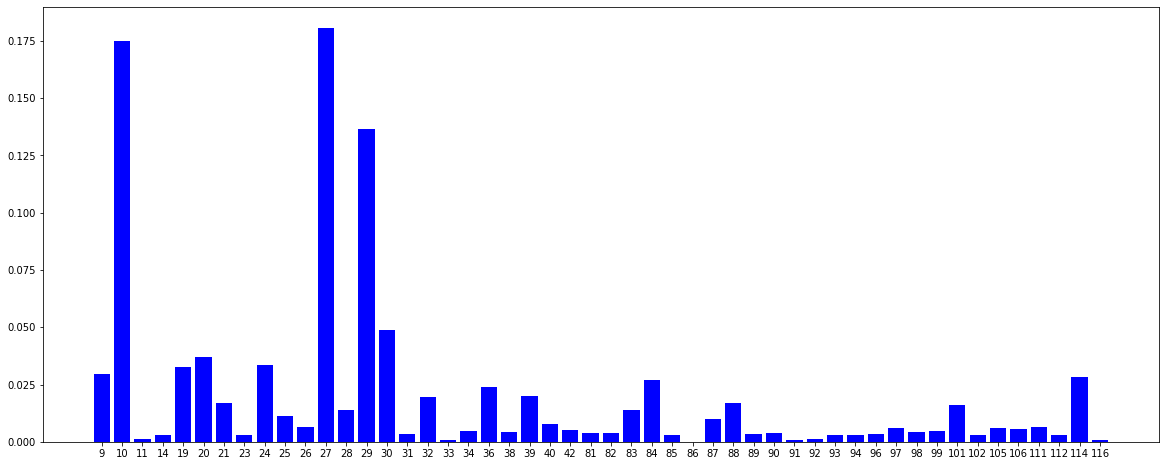

In [ ]:
# 2
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_xticks(np.arange(len(sorted(train.Category.unique()))))
ax.set_xticklabels(sorted(train.Category.unique()))
ax.bar(np.arange(len(sorted(train.Category.unique()))), train.Category.value_counts().sort_index(
) / train.Category.value_counts().sort_index().sum(), color='blue')

In [ ]:
# 3
# Тут присутвует средний дисбаланс классов, а это в свою очередь сильно влияет на модель.
print('Наибольший класс: ', train.Category.value_counts().index[0], ' с долей ', max(train.Category.value_counts().sort_index(
) / train.Category.value_counts().sort_index().sum()))
print('Наименьший класс: ', train.Category.value_counts().index[-1], ' с долей ', min(train.Category.value_counts().sort_index(
) / train.Category.value_counts().sort_index().sum()))

Наибольший класс:  27  с долей  0.1807067572782698
Наименьший класс:  86  с долей  3.8969854337769914e-05


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
X = vector.fit_transform(train['title and description'])
X.shape

(4234042, 2125805)

In [ ]:
import re

In [ ]:
search1 = re.compile('^[0-9]+')
search2 = re.compile('^[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]')

In [ ]:
count1, count2 = 0, 0

for word in vector.vocabulary_.items():
    count1 += len(search1.findall(word[0]))
    count2 += len(search2.findall(word[0]))

print("Слова, наичнающиеся с цифр: ", count1)
print("Слова, начинающиеся с пунктуации ", count2)

Слова, наичнающиеся с цифр:  610871
Слова, начинающиеся с пунктуации  2043


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
search_punct = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]')
search_count = re.compile('[0-9]')

In [ ]:
def tokenaizer(line: str):
    stemmer = SnowballStemmer('russian')

    return [stemmer.stem(w)
            for w in 
            word_tokenize(line.lower())
            if (w not in stopwords.words('russian'))
            and (len(search_punct.findall(w)) == 0) and (len(search_count.findall(w)) == 0)]
print(tokenaizer(train['title and description'][0]))

['эб', 'renault', 'nissan', 'dci', 'delphi', 'год', 'комплект', 'эб', 'мозг', 'компьютер', 'мотор', 'двигател', 'коммутатор', 'электрон', 'блок', 'управлен', 'двигател', 'компьютер', 'мотор', 'рен', 'kangoo', 'канг', 'канг', 'мега', 'сценик', 'laguna', 'лагун', 'clio', 'кли', 'nissan', 'micra', 'нисса', 'микр', 'друг', 'рен', 'нисса', 'дизел', 'топливн', 'аппаратур', 'делф', 'оригина', 'отличн', 'состоян', 'проверен', 'гарант', 'запчаст', 'предоставля', 'гарант', 'возможн', 'установк', 'подробн', '—', 'раздел', '«', 'компан', '»', 'дорож', 'сво', 'репутац', 'торгу', 'легальн', 'контрактн', 'запчаст', 'дета', 'налич', 'таможен', 'документ', 'запчаст', 'автомобил', 'пробег', 'росс', 'отправля', 'друг', 'регион', 'таможен', 'союз', 'транспортн', 'компан', 'наложн', 'платеж']


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(12345)
random = np.random.choice(np.arange(train.shape[0]), 500000)

X = CountVectorizer(tokenaizer).fit_transform(train["title and description"][random])
y = train["Category"][random]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12345)
sgd = SGDClassifier().fit(X_train, y_train)
print("accuracy: ", accuracy_score(y_test, sgd.predict(X_test)))

accuracy:  0.874608


In [ ]:
#1
from sklearn.feature_extraction.text import TfidfVectorizer

tok_idf = TfidfVectorizer(tokenizer = tokenaizer)
X = tok_idf.fit_transform(train["title and description"][random])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12345) 
sgd_idf = SGDClassifier().fit(X_train, y_train)
print("accuracy tf-idf: ", accuracy_score(y_test, sgd_idf.predict(X_test)))
#качество стало хуже и время работы сильно увеличлось

accuracy tf-idf:  0.871952


In [ ]:
#2
tok_idf = TfidfVectorizer(tokenizer = tokenaizer,  max_df = 0.9)
X = tok_idf.fit_transform(train["title and description"][random])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12345) 
sgd_idf = SGDClassifier().fit(X_train, y_train)
print("accuracy tf-idf with max_df = 0.9: ", accuracy_score(y_test, sgd_idf.predict(X_test)))
#размер матрицы уменьшился, но качество стало чуть лучше в сравнении с 1 пунктом

accuracy tf-idf with max_df = 0.9:  0.87336


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
HashingV = HashingVectorizer(tokenaizer, 30000)
X = HashingV.fit_transform(train["title and description"][random])
sgd2 = SGDClassifier().fit(X_train, y_train)
print("аccuracy: ", accuracy_score(y_test, sgd_idf.predict(X_test)))
print(X.shape)
#качество такое же, как во 2 пунтке 8 задания, но время работы стало лучше 
#из трех подходов оказался самым эффективным первый способ, так как этот способ показал лучший результат по качеству
#и времени выполнения работы

аccuracy:  0.87336
(500000, 1048576)


In [ ]:
сounter = CountVectorizer(tokenaizer)

X_train = сounter.fit_transform(train["title and description"])
y_train = train["Category"]

In [ ]:
X_test = сounter.transform(test["title and description"])
sgd3 = SGDClassifier().fit(X_train, y_train)
prediction = sgd3.predict(X_test)

In [ ]:
predict = pd.DataFrame(data=np.concatenate([test['itemid'].to_numpy().reshape(-1, 1),
                                            prediction.reshape(-1, 1)], axis=1), columns=['Id', 'Category'])

In [ ]:
predict.to_csv("pred", index = False)